# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# Dataset Loading

In [3]:
#Importing the dataset
df = joblib.load("cleaned_dataset.pkl")

# Getting Basic Info

In [4]:
#Printing the dimension
df.shape

(147905, 44)

Dataset contain 147905 rows and 44 columns

In [5]:
#Printing all the column names
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'difficulty_score',
       'binary_label'],
      dtype='object')

All the column names are printed above

In [6]:
#Seeing data types of all columns
df.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64




*   Total Features - 43 (excluding index)
*   Categorical Features - 4 (protocol_type, service, flag, binary_label)
*   *These categorical features will need Label encoding later*



In [7]:
#Checking for any null data (already done once in data cleaning)
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


There is no null values in the data

In [8]:
#Stroing all the columns having the numerical data as column in numerical_cols
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Disribution of Numerical Features

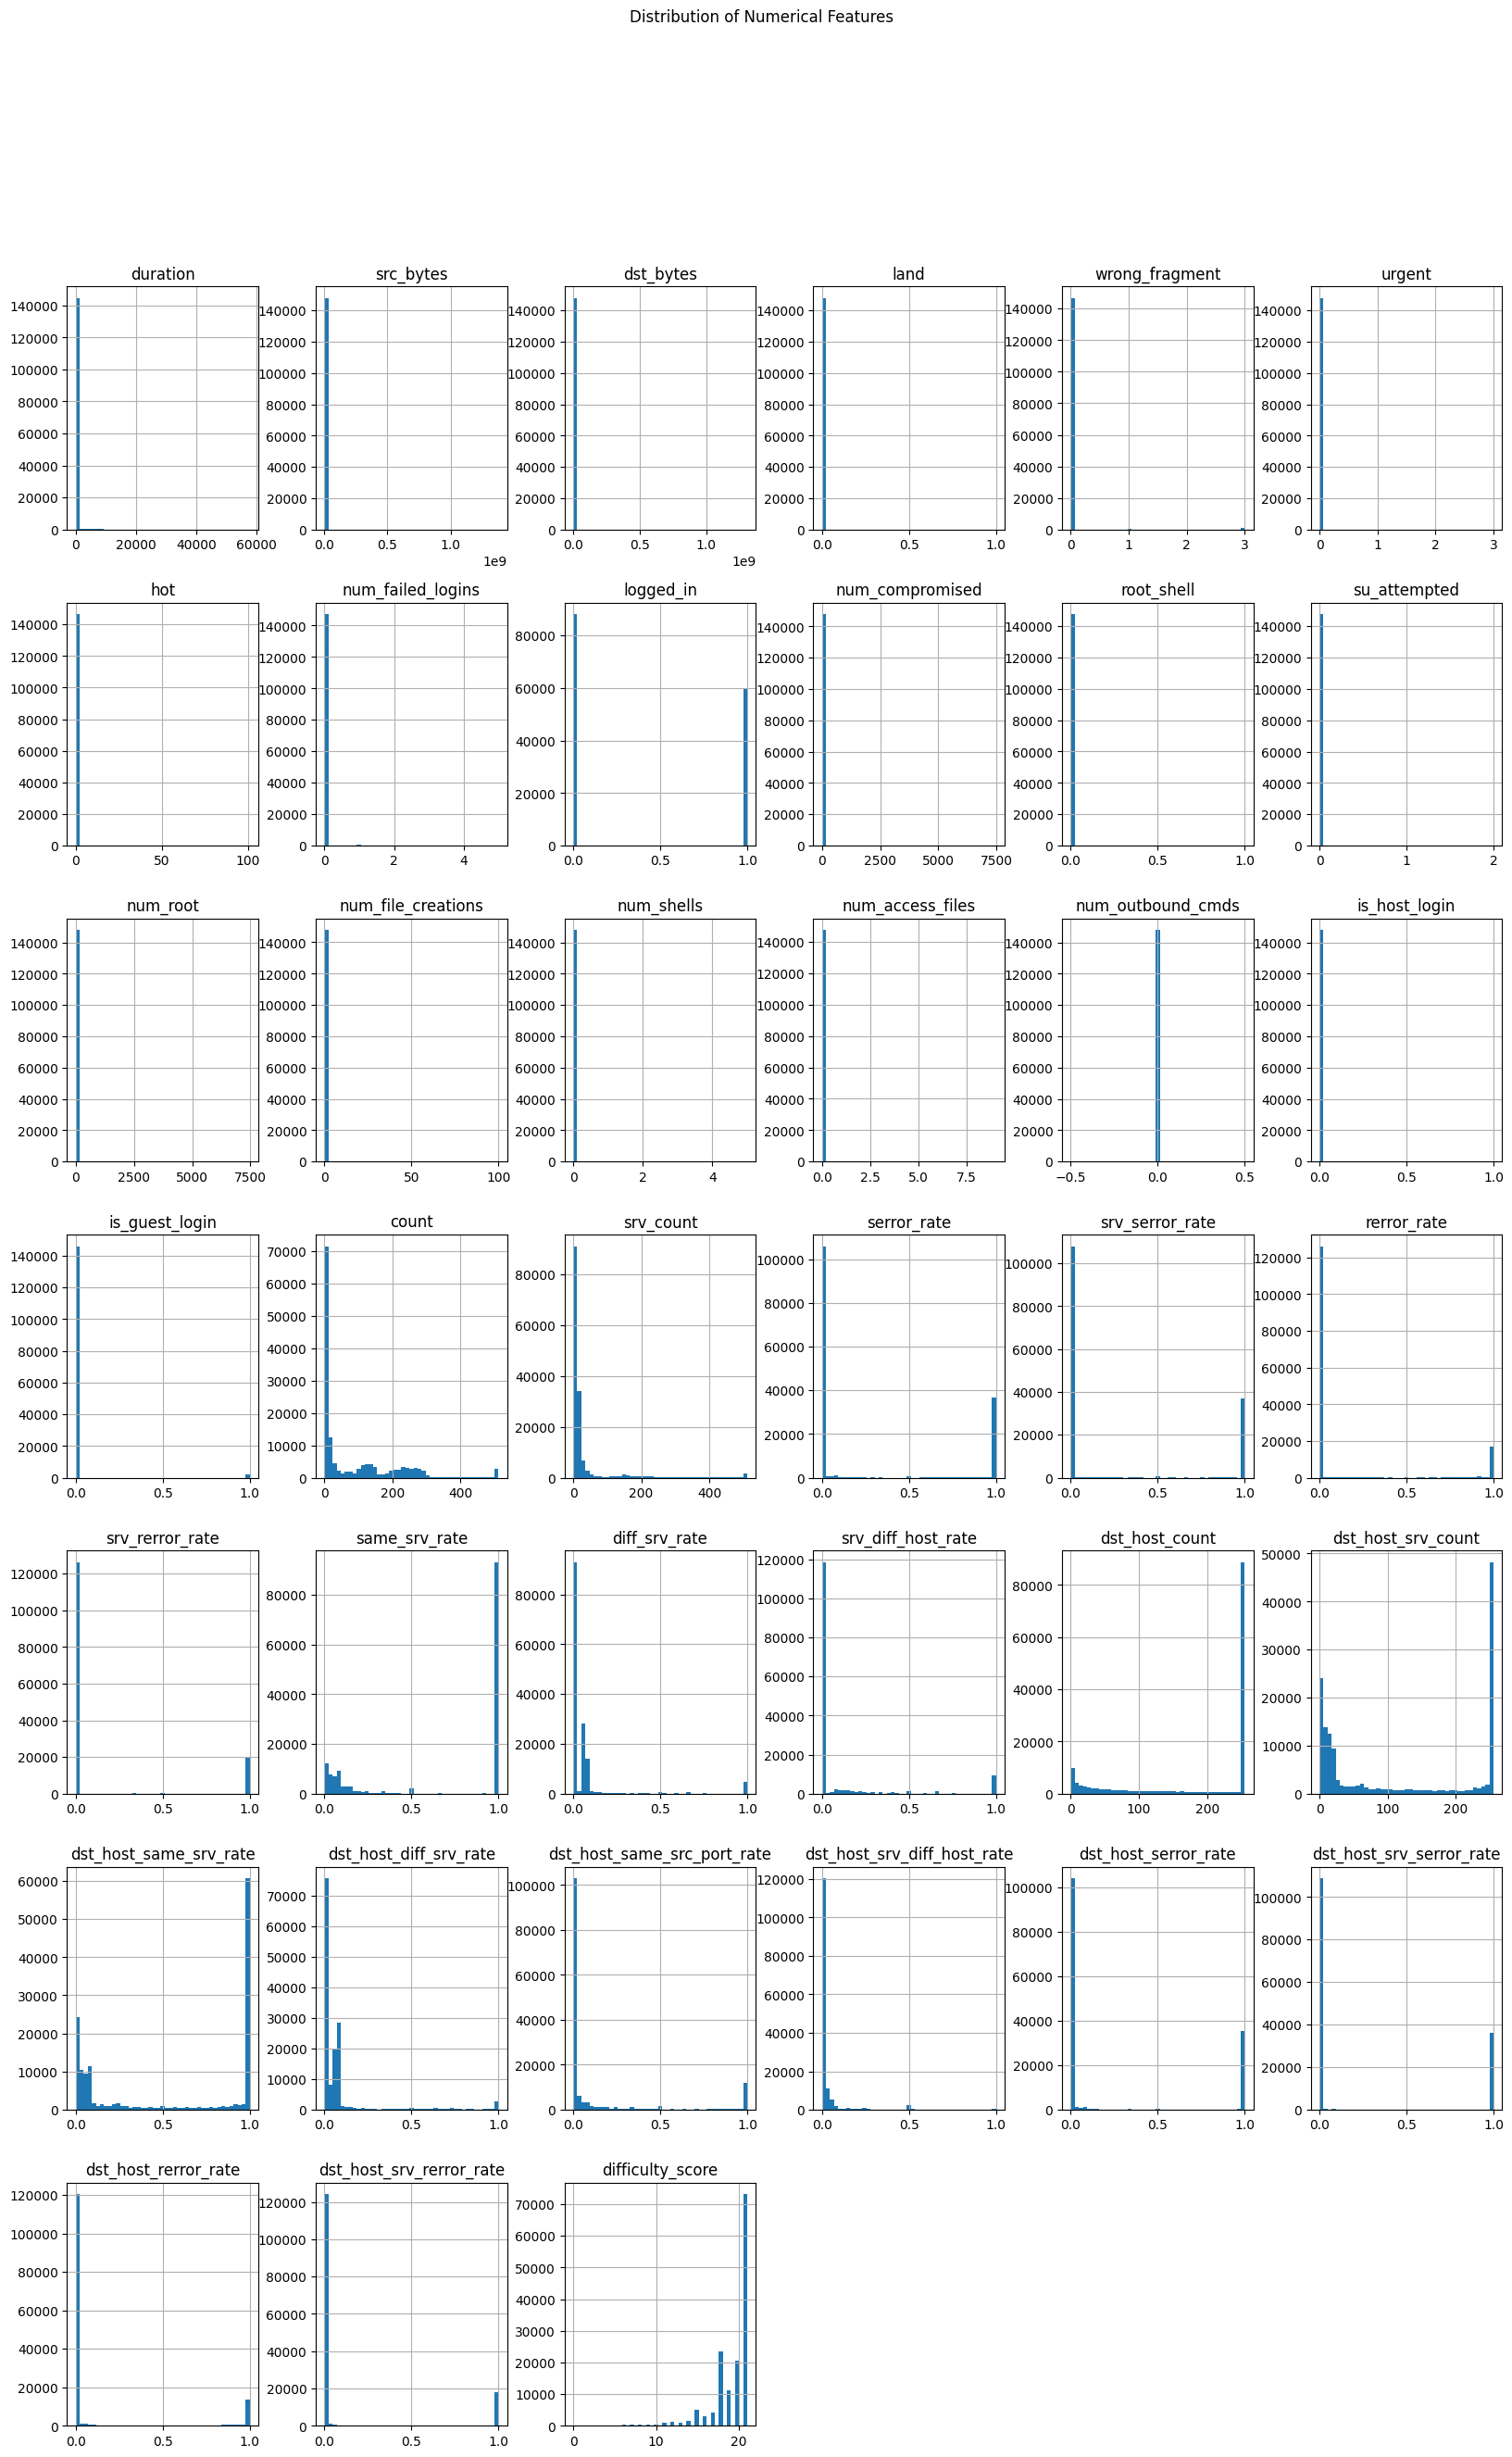

In [9]:
#Making a histogram of every numerical feature
df[numerical_cols].hist(bins=43, figsize=(20, 30))
plt.suptitle("Distribution of Numerical Features")
plt.show()

*   Features like land, logged_in, is_guest_login, root_shell, su_attempted, etc., are binary
*   Many columns (e.g., urgent, num_outbound_cmds, wrong_fragment) have overwhelming zeros
*   Some features span huge ranges (src_bytes, dst_bytes), others are tightly bounded

# Correlation Heatmap

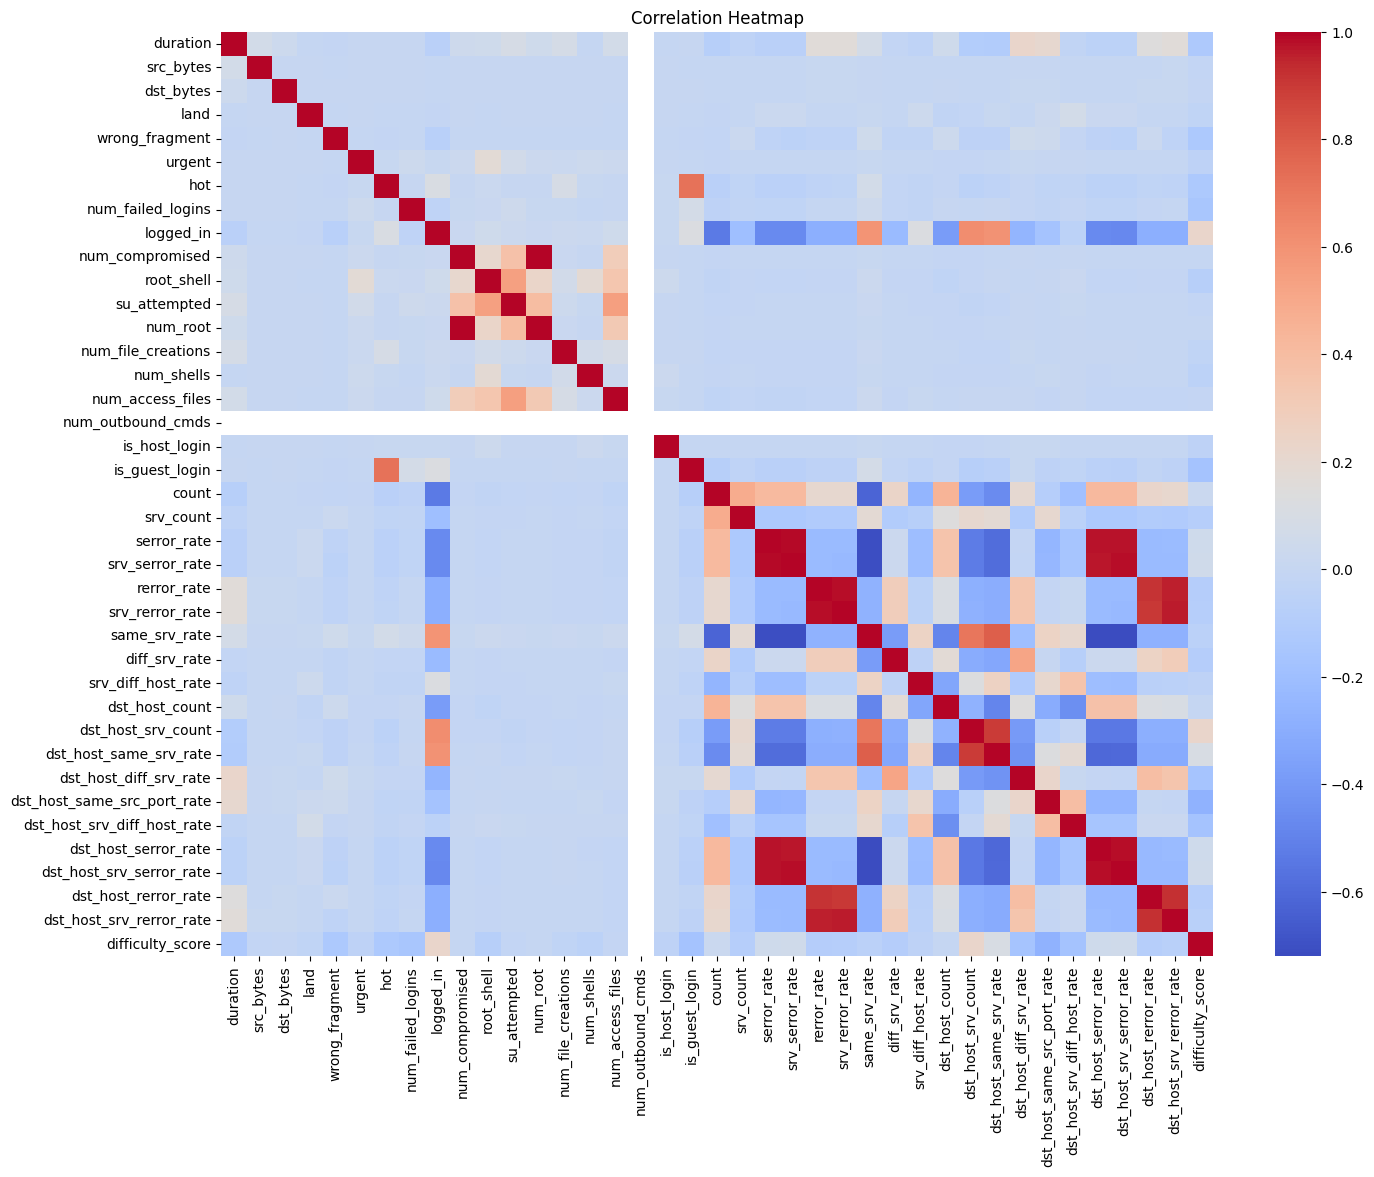

In [10]:
#Making a correlation heatmap of every numerical column
corr = df[numerical_cols].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

* Strong Positive Correlations

    * srv_serror_rate ⬌ serror_rate

    * srv_rerror_rate ⬌ rerror_rate

    * dst_host_srv_serror_rate ⬌ dst_host_serror_rate

    * dst_host_srv_rerror_rate ⬌ dst_host_rerror_rate

    * and more

* num_compromised, root_shell, num_root have moderate correlations

* Most features have weak or no correlation with others implying independency of data

# Class-wise Feature Means

In [11]:
#Calculating the mean of numerical columns grouped by normal and attack (in binary_label)
grouped = df.groupby('binary_label')[numerical_cols].mean().T
display(grouped.sort_values(by='normal', ascending=False))

binary_label,attack,normal
src_bytes,71392.153611,11810.431450
dst_bytes,31094.870833,4313.608217
dst_host_srv_count,38.852606,193.620248
duration,412.976924,153.447782
dst_host_count,222.326929,148.386508
srv_count,26.522435,29.244368
count,146.762585,24.330354
difficulty_score,18.203682,20.273290
same_srv_rate,0.349080,0.971000
dst_host_same_srv_rate,0.220707,0.822487


* Features like src_bytes, dst_bytes, dst_host_srv_count have a very high difference in mean values of normal and attack, hence they can be very useful in the model

* Features like serror_rate, srv_serror_rate are high in attack class but almost 0 in normal class, implying they are very high during attack

* Features like num_outbound_cmds, is_host_login do not change much in both the classes implying they are not much useful for the data

# Feature Skewness

In [12]:
#Compute skewness of numerical features and displaying them in descending order
skew_vals = df[numerical_cols].skew().sort_values(ascending=False)
print("\nFeature Skewness:\n", skew_vals)


Feature Skewness:
 dst_bytes                      314.287401
num_compromised                264.920254
num_root                       250.017717
src_bytes                      206.255090
is_host_login                  111.007507
urgent                         110.113989
num_file_creations              86.886513
num_shells                      77.712399
land                            71.395210
num_access_files                45.181253
su_attempted                    45.012081
root_shell                      25.637961
num_failed_logins               22.163946
hot                             13.942198
duration                        12.370326
wrong_fragment                  12.096936
is_guest_login                   8.827510
dst_host_srv_diff_host_rate      5.857773
srv_count                        4.713408
diff_srv_rate                    4.078795
dst_host_diff_srv_rate           3.551706
srv_diff_host_rate               2.850074
dst_host_same_src_port_rate      2.132651
dst_host_srv_r

* Features like dst_bytes , num_compromised , num_root have high skew meaning they can have outliers

* Feature like is_guest_login, dst_host_srv_diff_host_rate have moderate level skewness

* Features like dst_host_srv_serror_rate, dst_host_serror_rate have very low skew

* Features like dst_host_same_srv_rate , same_srv_rate have negative skew

# Distribution of Categorical Data

In [13]:
#Making a simple function for pie plot
def pie_plot(df, cols_list, rows, cols, threshold=0.05):
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    axes = axes.ravel()

    for ax, col in zip(axes, cols_list):
        val_counts = df[col].value_counts(normalize=True)

        #Separating major and minor values baseed on threshold
        major_vals = val_counts[val_counts >= threshold]
        minor_vals = val_counts[val_counts < threshold]

        #Classsifying all the minor values in 'others'
        combined_vals = major_vals.copy()
        if not minor_vals.empty:
            combined_vals["Others"] = minor_vals.sum()

        combined_vals.plot(ax=ax, kind='pie', autopct='%1.0f%%', startangle=90, textprops={'fontsize': 10})
        ax.set_title(f"{col}", fontsize=12)
        ax.set_ylabel("")

    total_axes = rows * cols
    for i in range(len(cols_list), total_axes):
        fig.delaxes(axes[i])

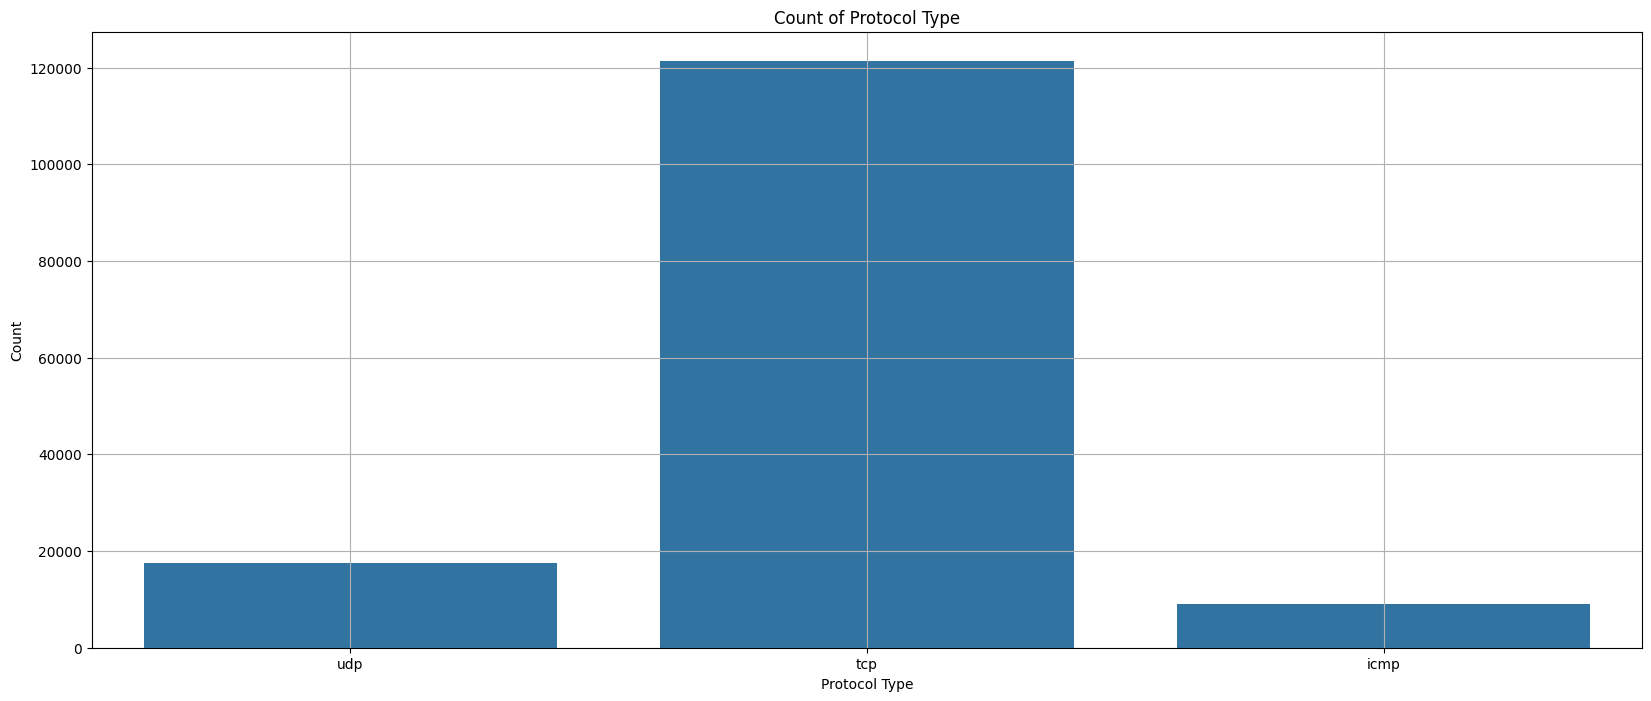

In [14]:
#Plotting the count distribution of 'protocol_type'
plt.figure(figsize=(20, 8))
sns.countplot(x='protocol_type', data=df)
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Count of Protocol Type')
plt.grid(True)
plt.show()

TCP traffic dominates the dataset, with significantly fewer UDP and ICMP packets

<ipython-input-15-01b078efa432>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


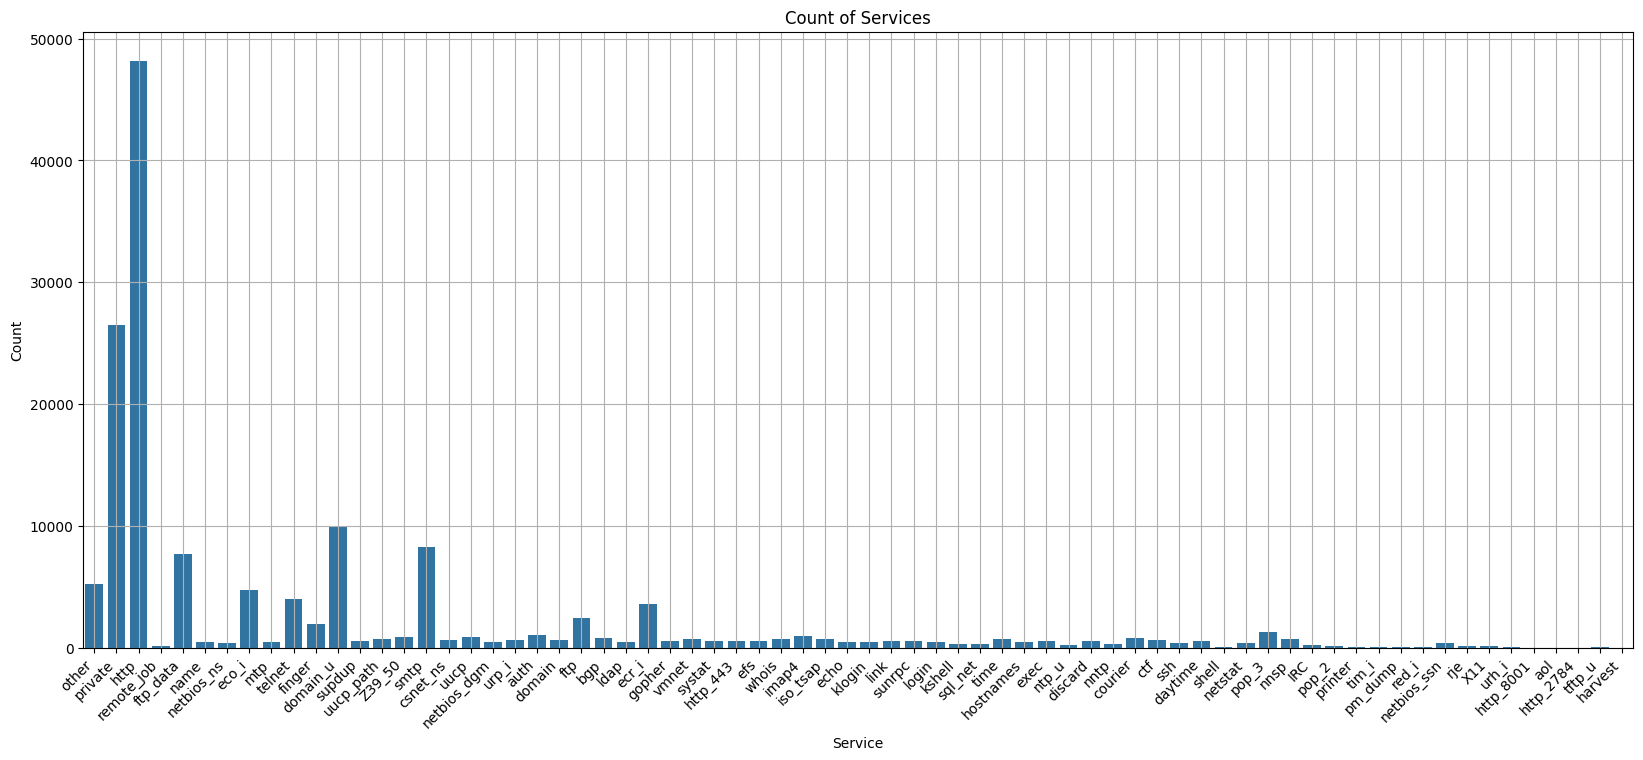

In [15]:
#Plotting the count distribution of 'service'
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

The http service is mostly used while some of the services are minimally used

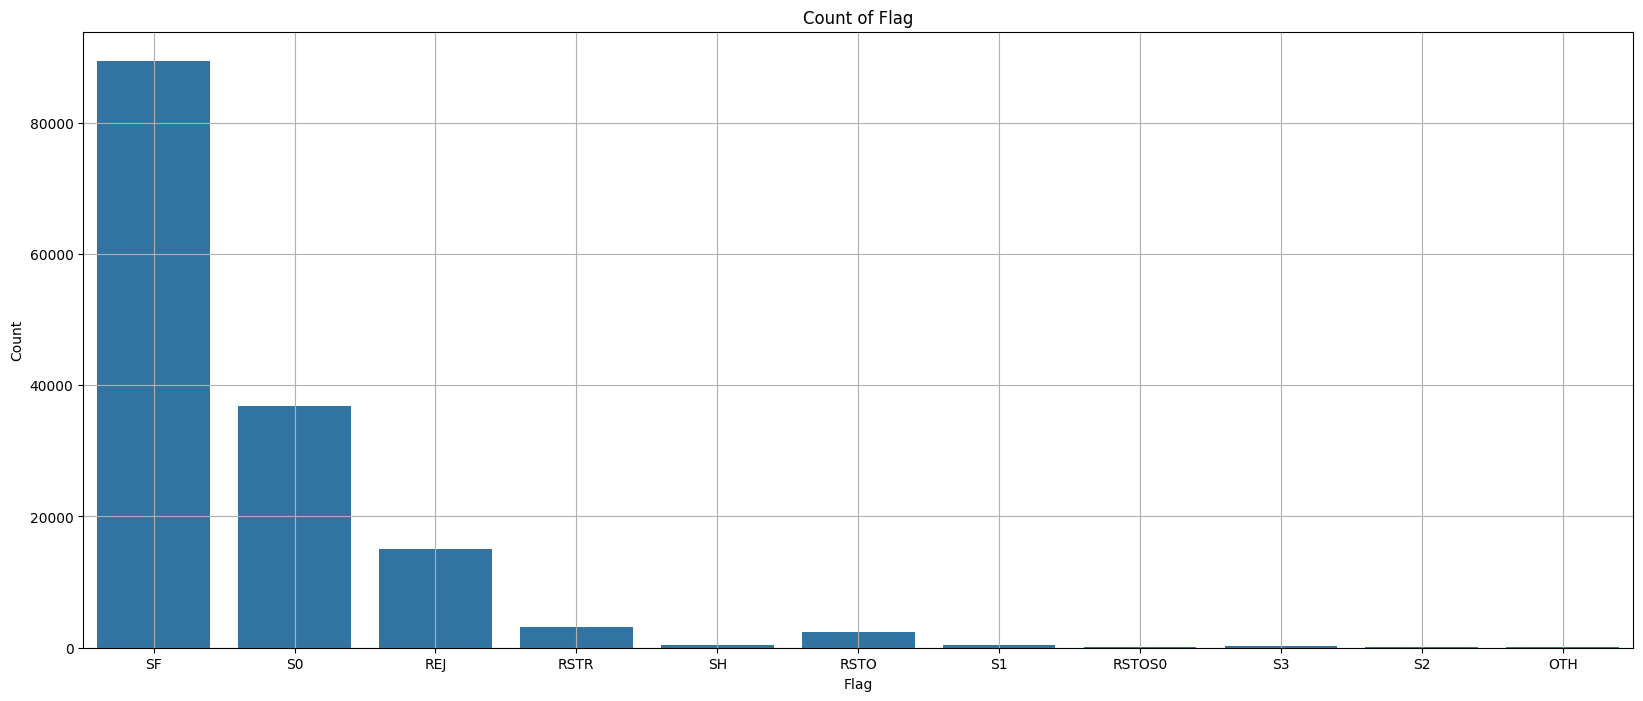

In [16]:
#Plotting the count distribution for 'flag'
plt.figure(figsize=(20, 8))
sns.countplot(x='flag', data=df)
plt.xlabel('Flag')
plt.ylabel('Count')
plt.title('Count of Flag')
plt.grid(True)
plt.show()

Flags like SF and S0 are mostly used

<ipython-input-17-c84b677f926c>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


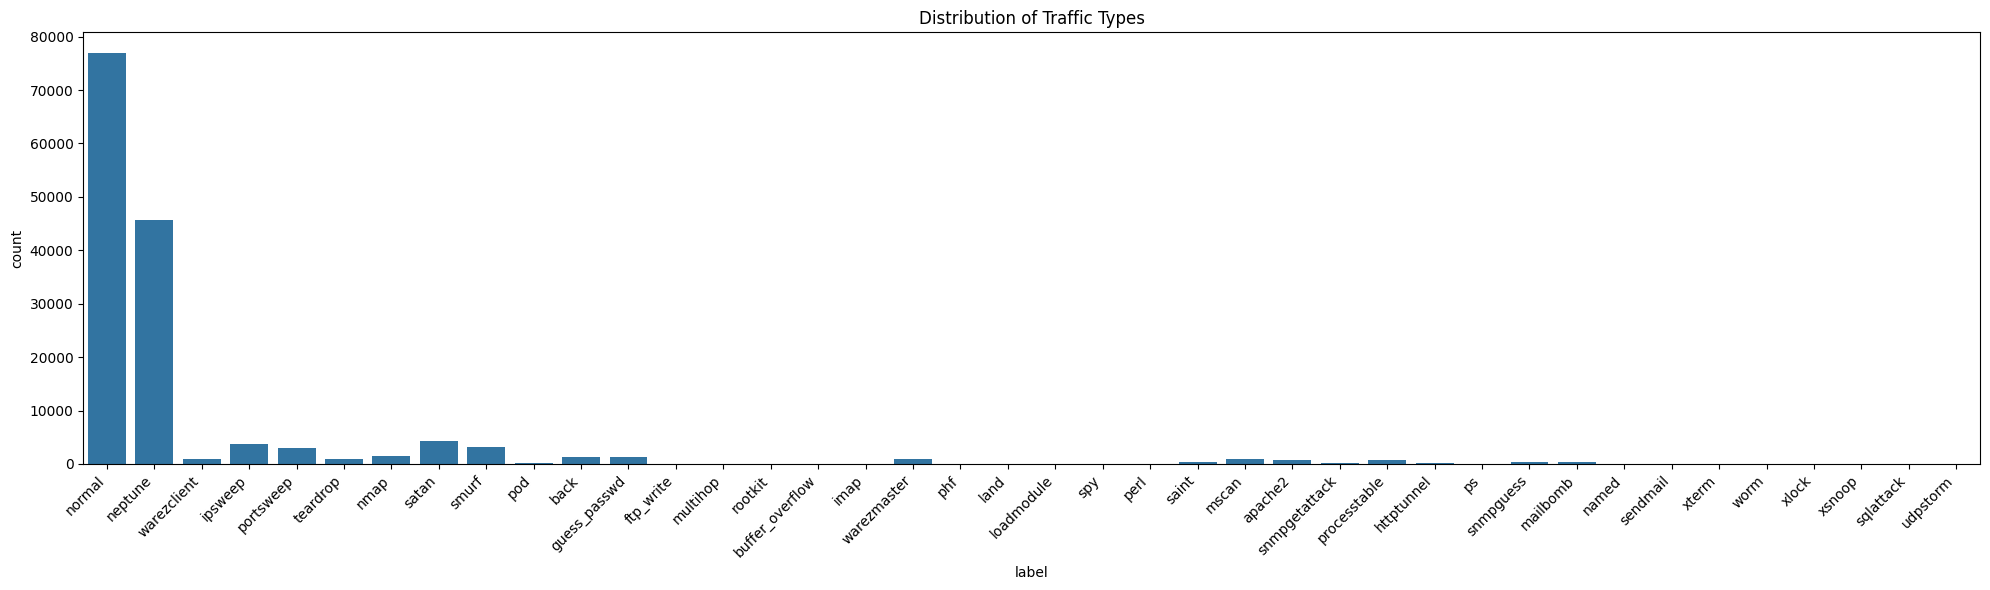

In [17]:
#Plotting the count distribution for 'label'
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='label', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Distribution of Traffic Types")
plt.tight_layout()
plt.show()

Most of the label is classified as Normal, all the others are classified as attack/anomoly in the set

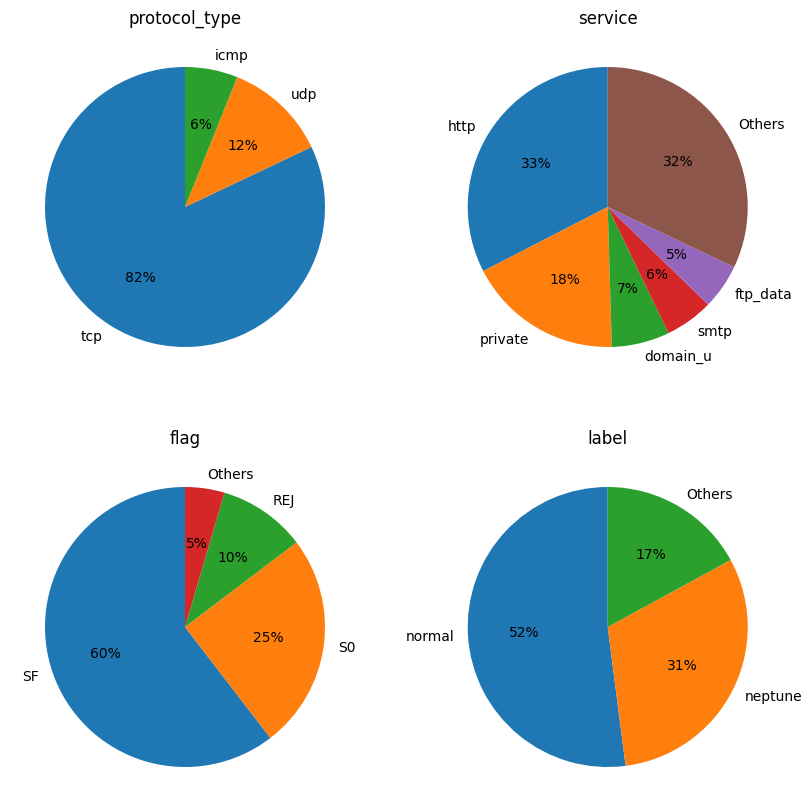

In [18]:
#Plotting a pie chart of all the categorical data
pie_plot(df, ['protocol_type', 'service', 'flag', 'label'], 2, 2)

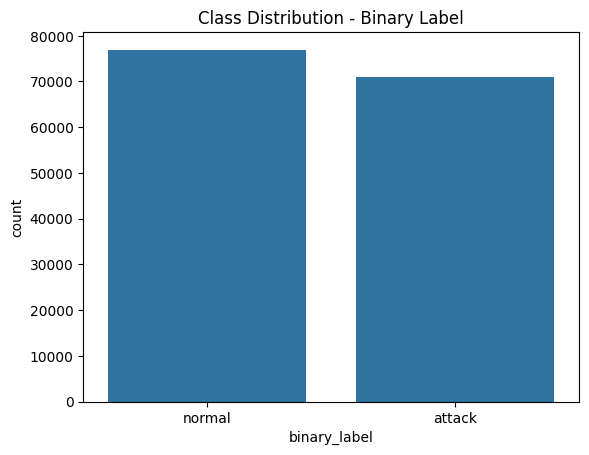

In [22]:
#Plotting the class distribution of Binary Label
sns.countplot(x="binary_label", data=df)
plt.title("Class Distribution - Binary Label")
plt.show()

Normal and attaack are almost similar in the binary_label

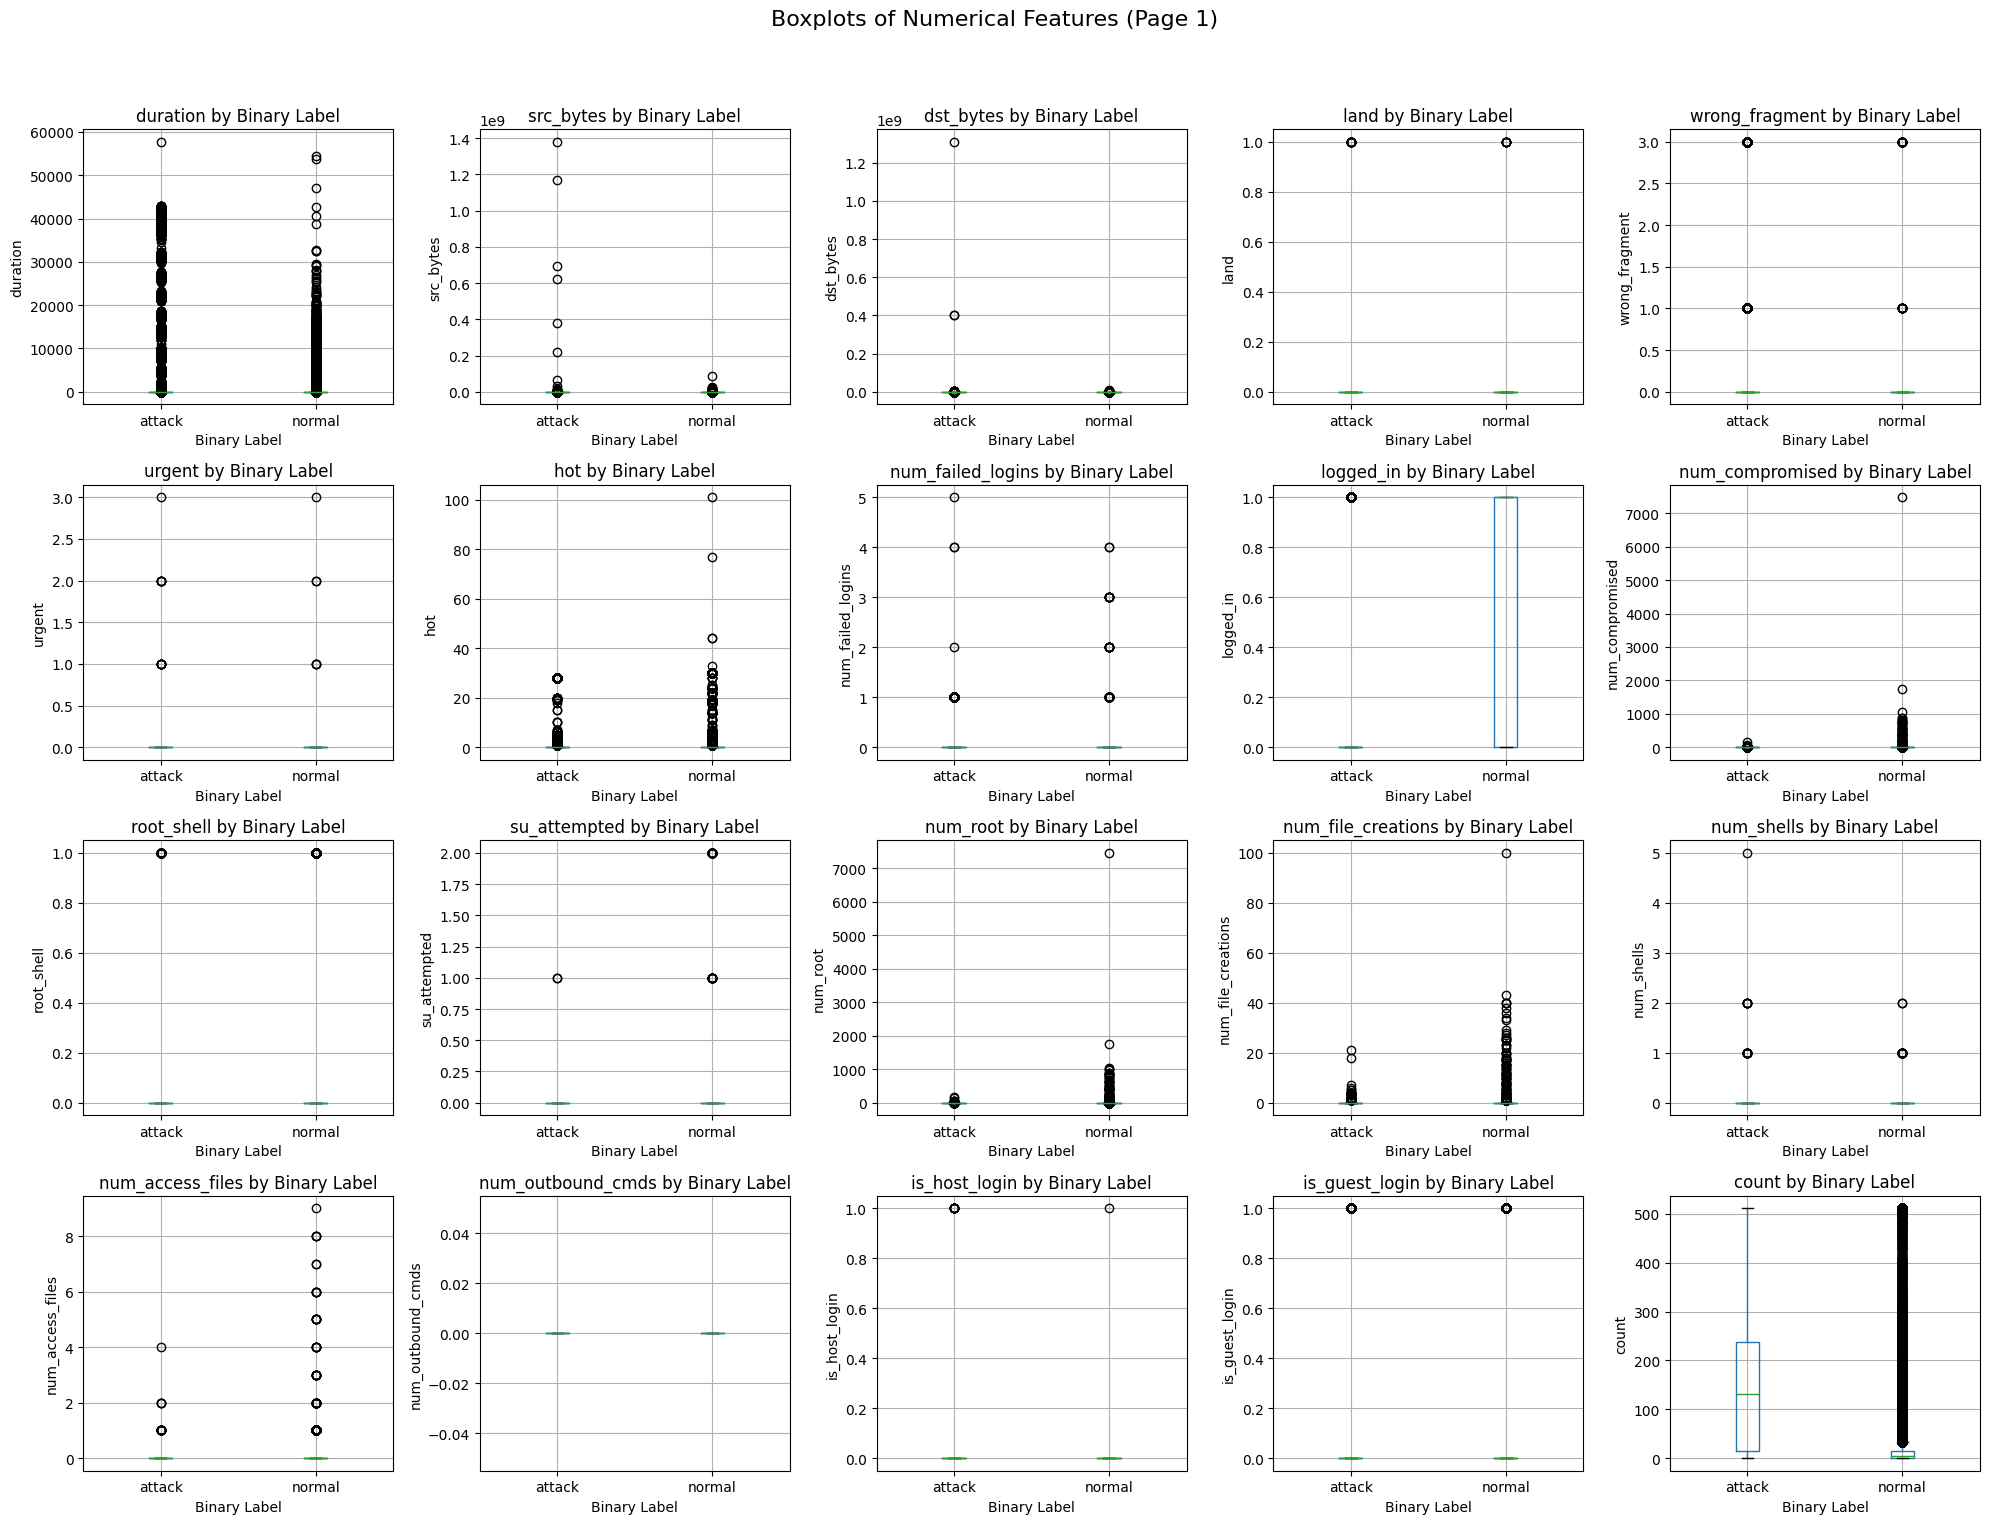

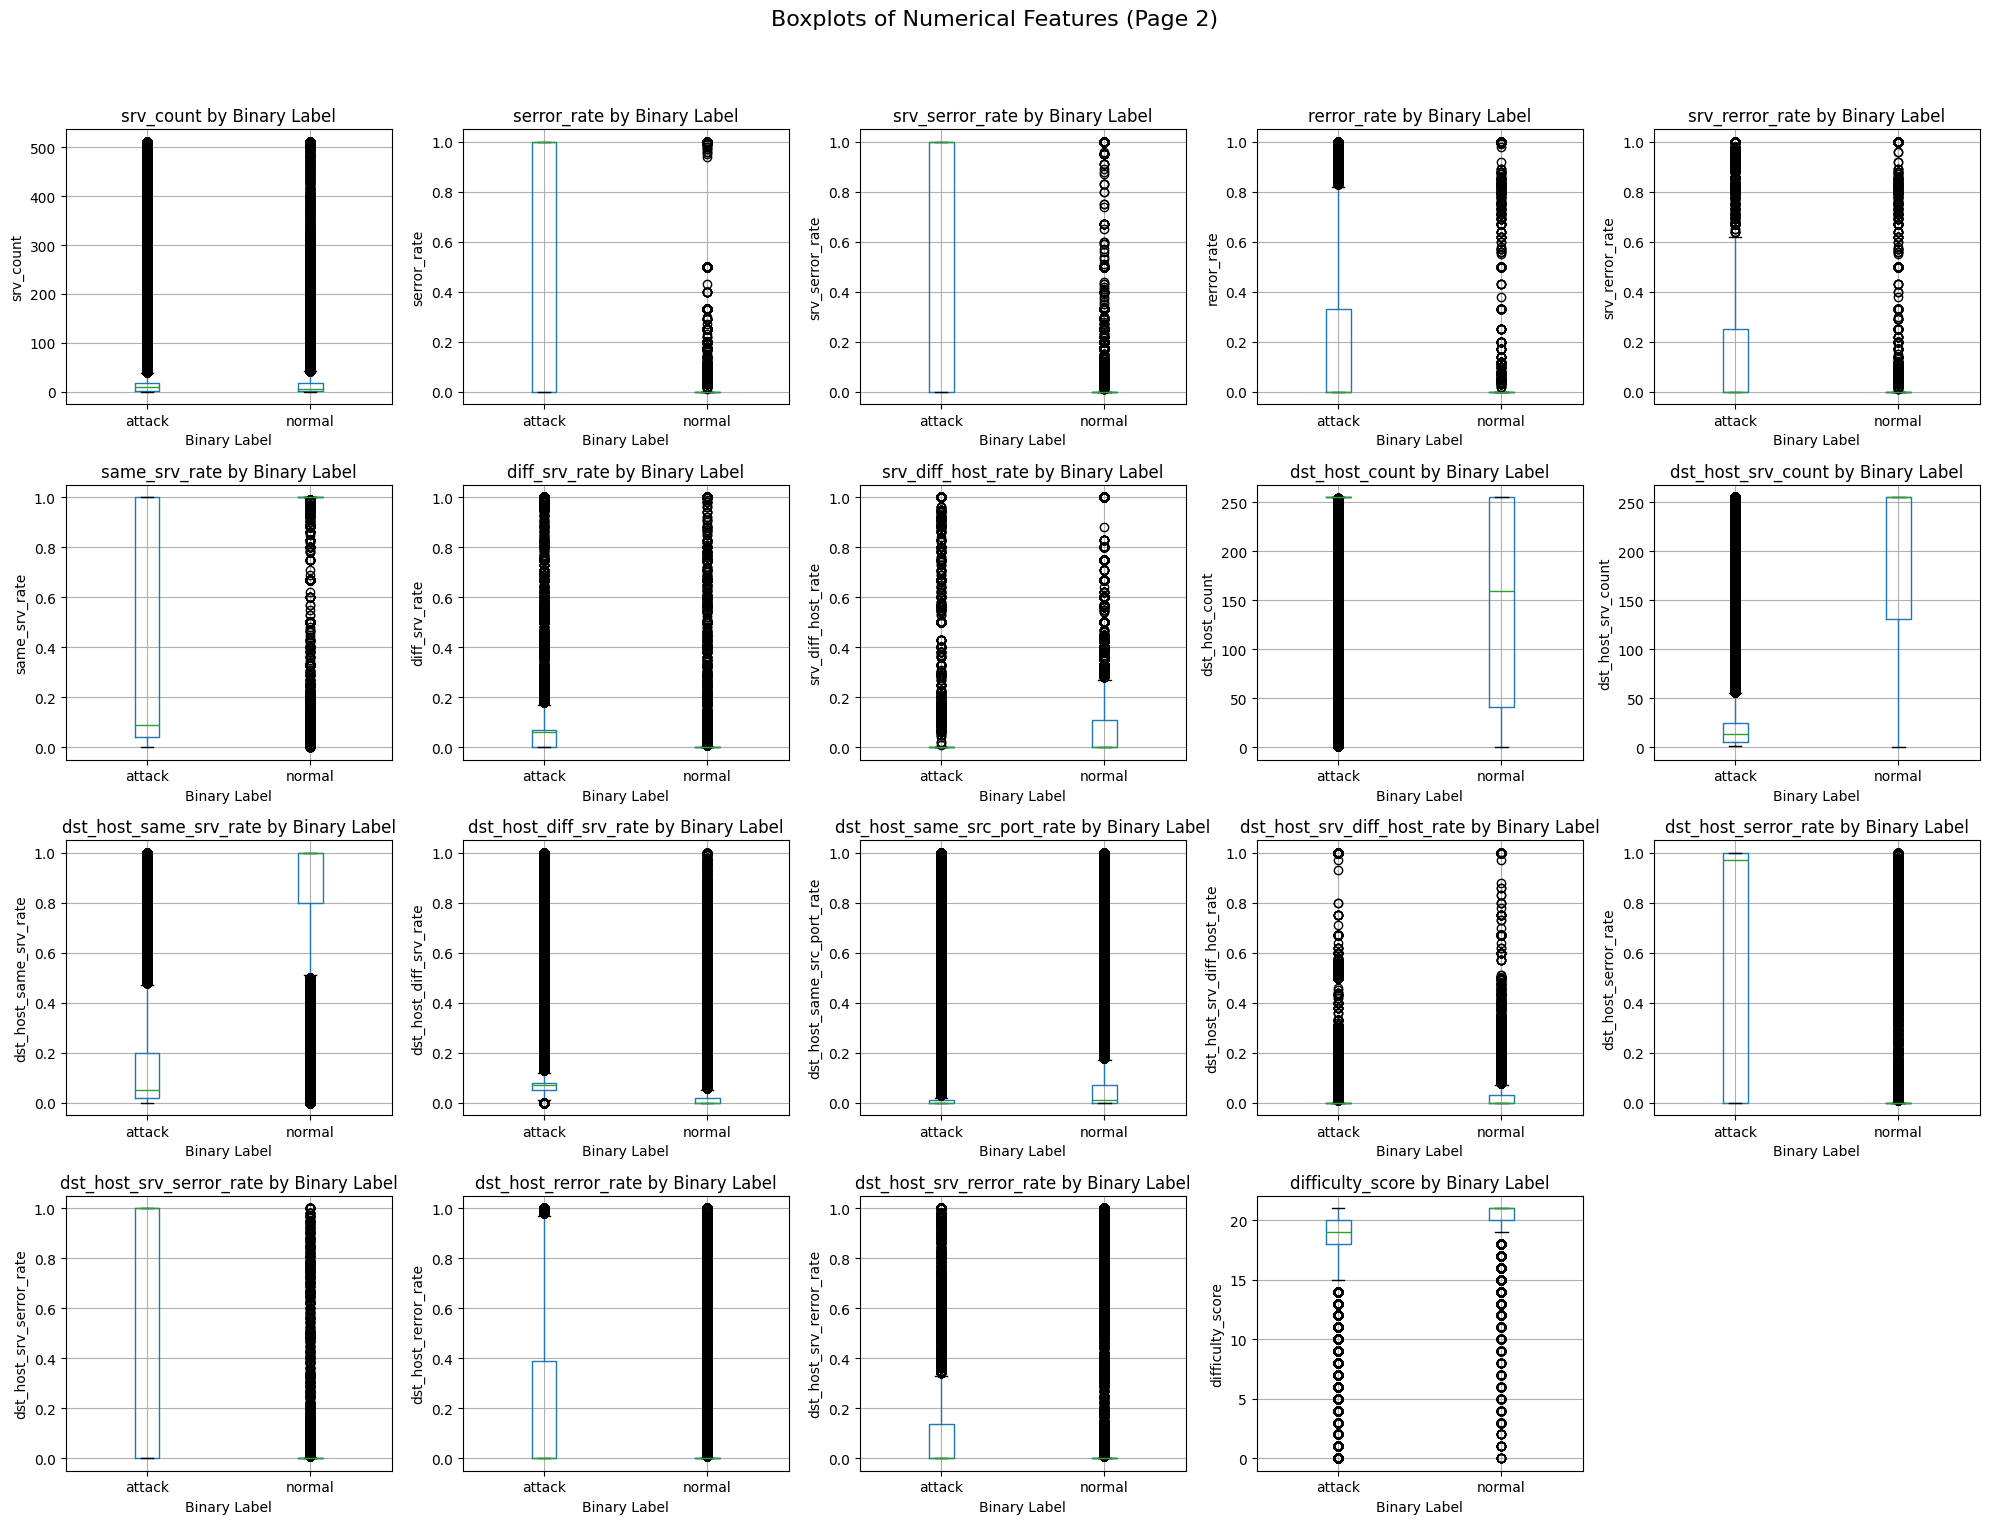

In [23]:
#Setting the numnber of plots in a page and grid layout
cols_per_page = 20
rows, cols = 4, 5

num_pages = math.ceil(len(numerical_cols) / cols_per_page)

#Loop through each page to plot boxplots
for page in range(num_pages):
    start_idx = page * cols_per_page
    end_idx = min(start_idx + cols_per_page, len(numerical_cols))
    current_cols = numerical_cols[start_idx:end_idx]

    #Creating subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 16))
    axes = axes.flatten()

    #Plot boxplots for each selected numerical column
    for idx, col in enumerate(current_cols):
        df.boxplot(column=col, by='binary_label', ax=axes[idx])
        axes[idx].set_title(f"{col} by Binary Label")
        axes[idx].set_xlabel("Binary Label")
        axes[idx].set_ylabel(col)

    for j in range(len(current_cols), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Boxplots of Numerical Features (Page {page+1})", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
